<a href="https://colab.research.google.com/github/stprior/explore-transformer/blob/main/Transformer_Graphviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install transformers
%pip install captum
import transformers
tokenizer = transformers.AutoTokenizer.from_pretrained("gpt2")
model = transformers.AutoModelForCausalLM.from_pretrained('EleutherAI/gpt-neo-125M')


     |████████████████████████████████| 2.8 MB 5.2 MB/s 
     |████████████████████████████████| 636 kB 52.0 MB/s 
     |████████████████████████████████| 3.3 MB 40.8 MB/s 
     |████████████████████████████████| 895 kB 48.9 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/526M [00:00<?, ?B/s]

GPTNeoForCausalLM(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(2048, 768)
    (drop): Dropout(p=0, inplace=False)
    (h): ModuleList(
      (0): GPTNeoBlock(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0, inplace=False)
            (resid_dropout): Dropout(p=0, inplace=False)
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=False)
            (q_proj): Linear(in_features=768, out_features=768, bias=False)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (c_proj): Linear(in_features=3072, o

In [2]:
import torch

def text_to_input_ids(text):
    toks = tokenizer.encode(text)
    return torch.as_tensor(toks).view(1, -1).cuda()

In [3]:
model = model.cuda()

In [4]:

text = "The forecast said that thunderstorm activity with the risk of hail will lead to localised"
tokens = text_to_input_ids(text)
result = model.forward(tokens,output_hidden_states=True)


In [5]:
%pip install torchviz
from torchviz import make_dot


  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=100b9c3326fa58b043f95a203f29be8c2db6fe01d968fbbdeb19ed137feb80ab
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [6]:
dot = make_dot(result.logits)
type(dot)

graphviz.dot.Digraph

In [7]:
small_result = model.transformer.h[0].forward(result.hidden_states[0])

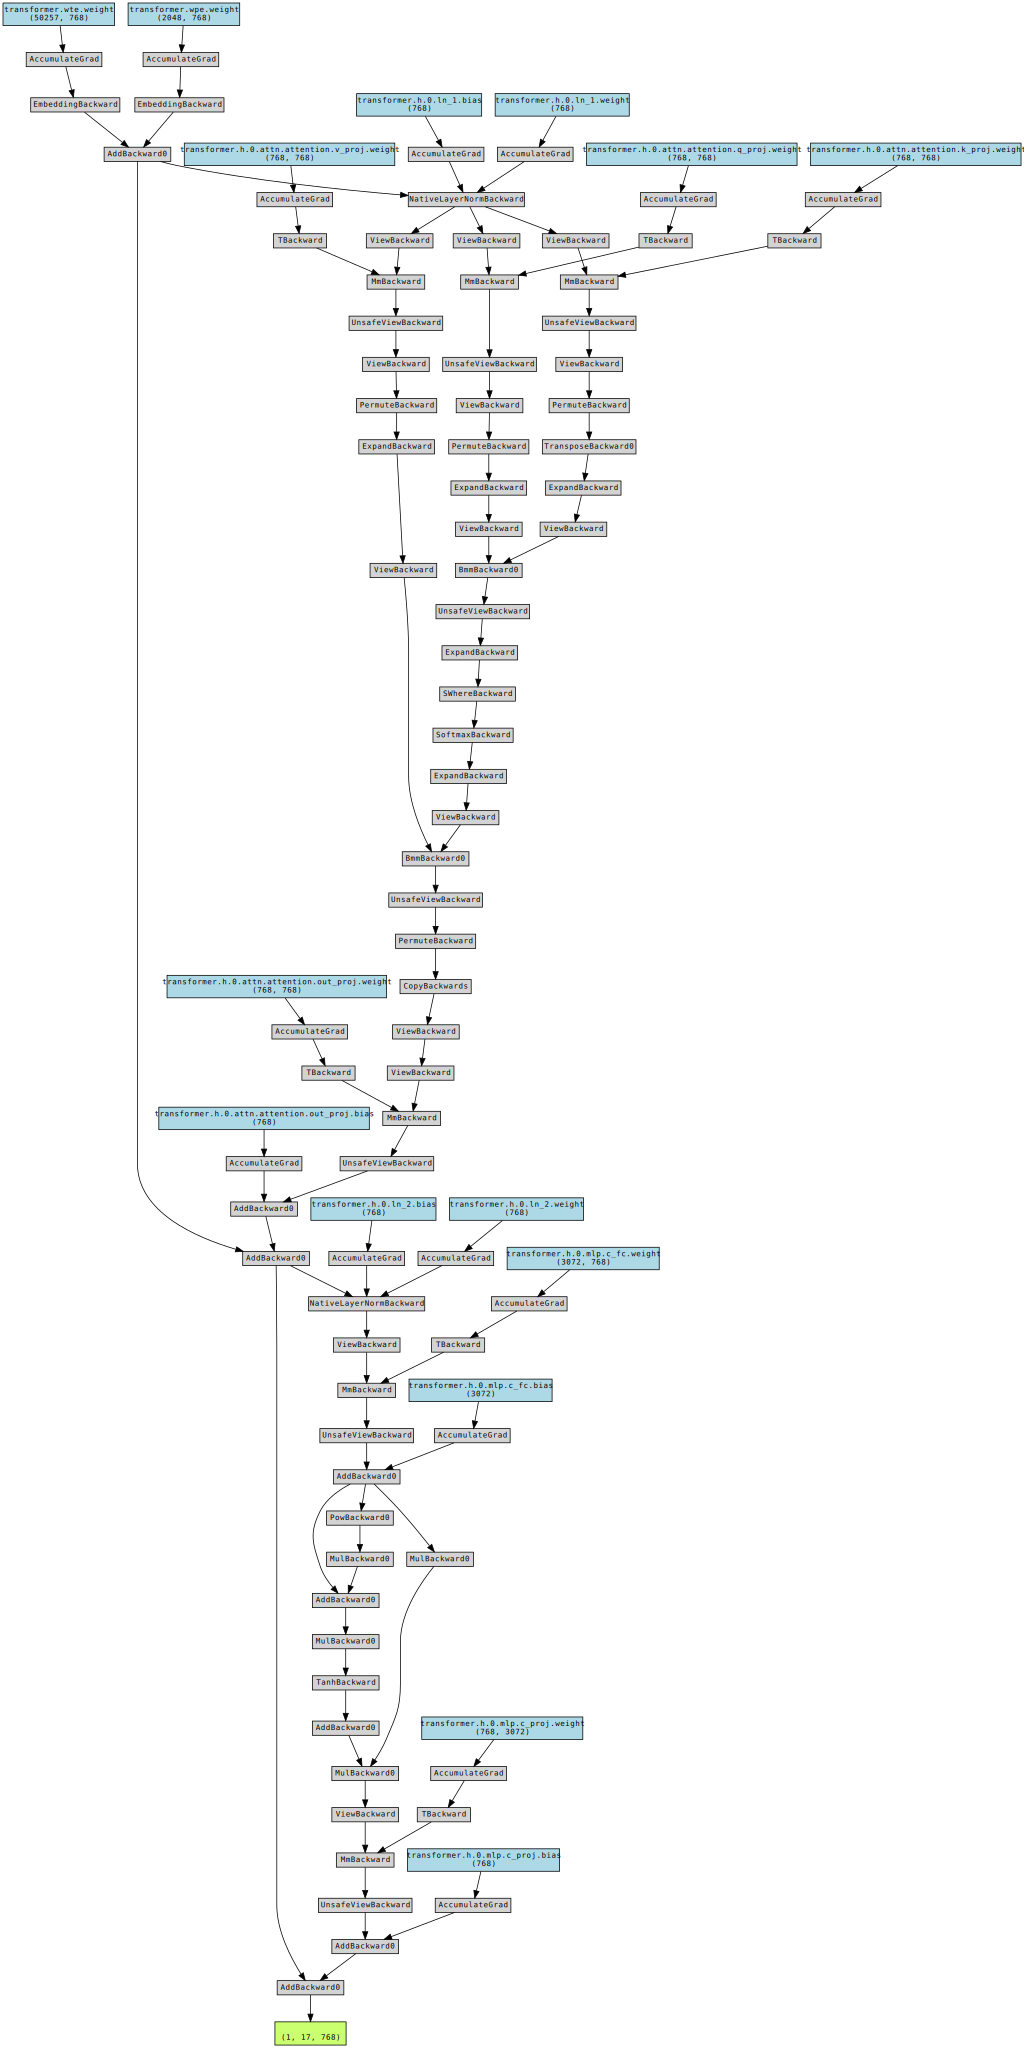

In [8]:
make_dot(small_result,params=dict(model.named_parameters()))

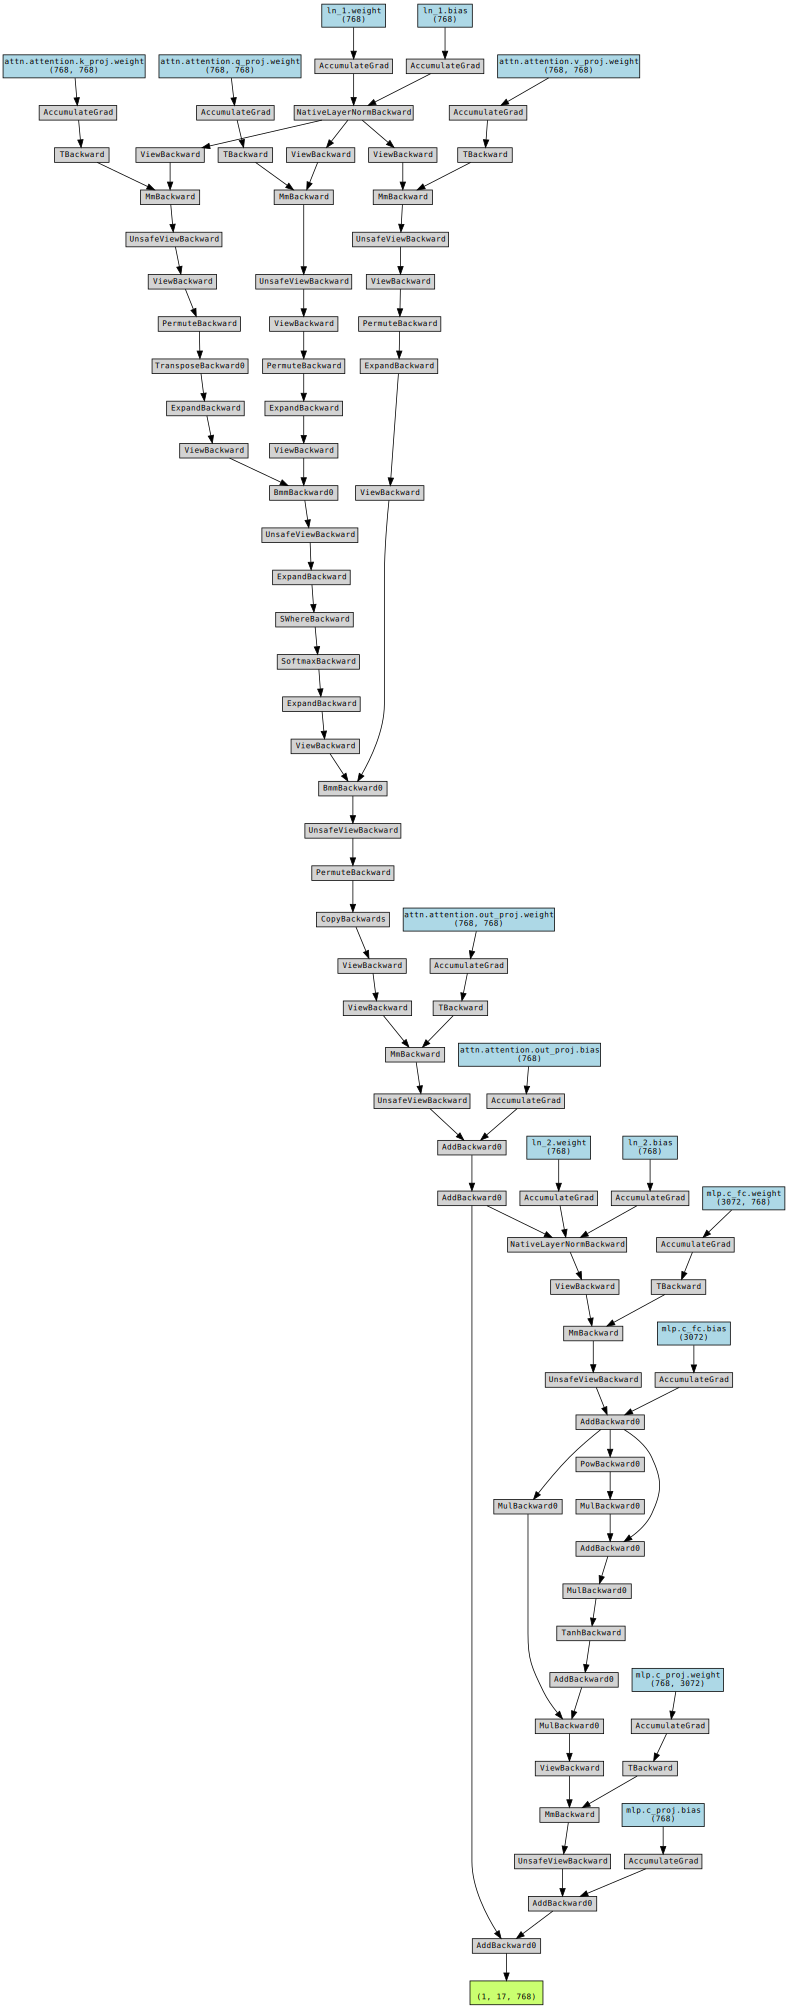

In [9]:
small_result_detached = model.transformer.h[0].forward(result.hidden_states[0].detach())
make_dot(small_result_detached,params=dict(model.transformer.h[0].named_parameters()))

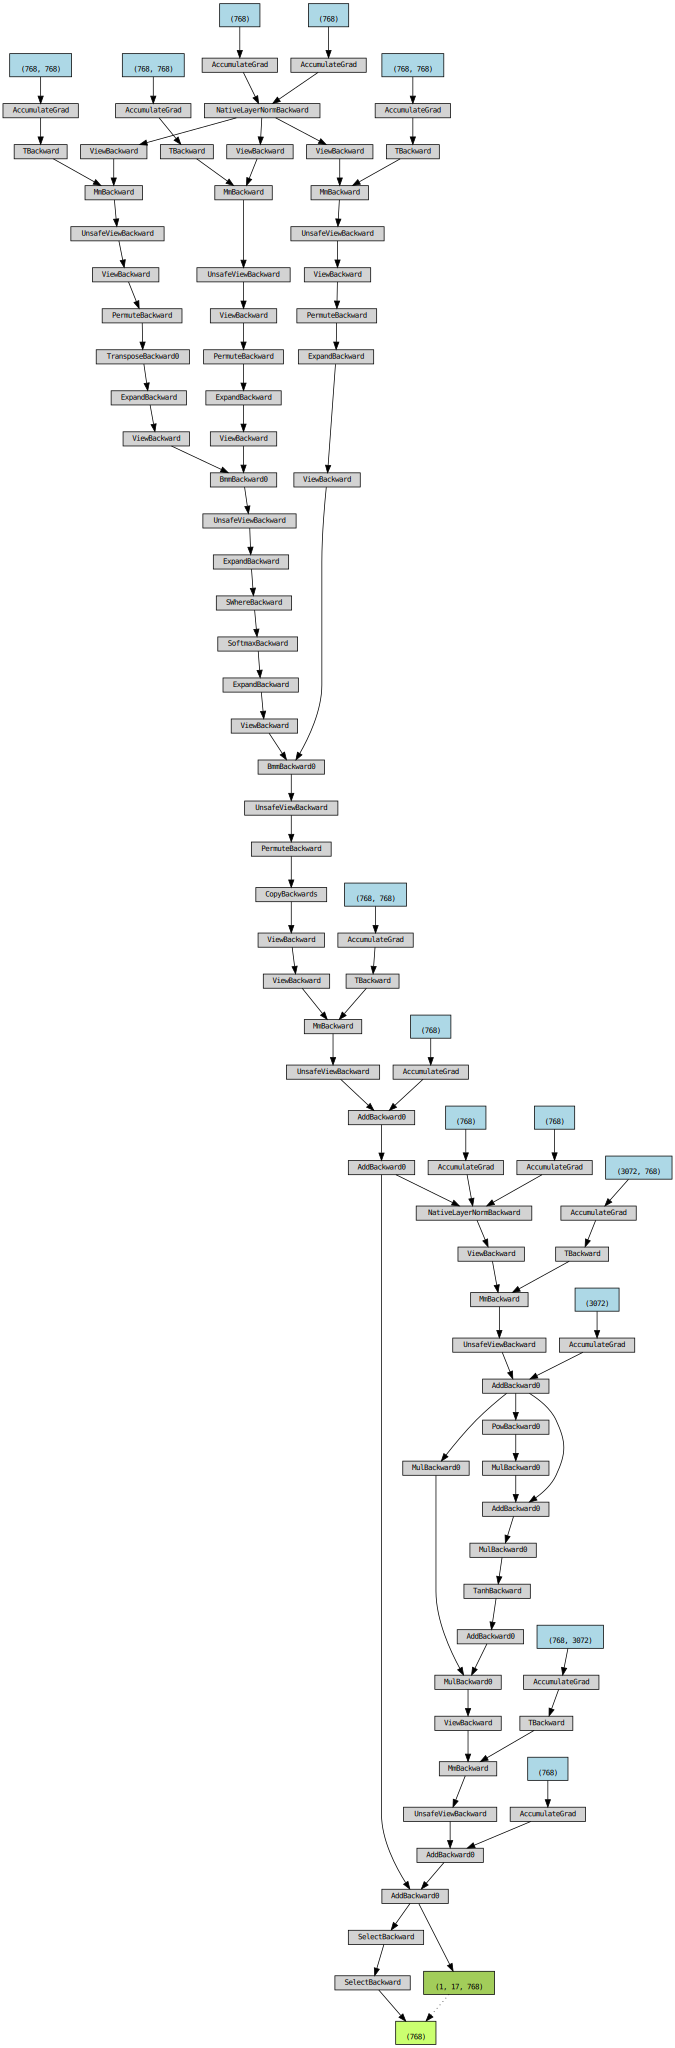

In [10]:
make_dot(small_result_detached[0][0,16])

In [11]:
model.named_parameters()

<generator object Module.named_parameters at 0x7f414937c250>

In [12]:
len(result.hidden_states),result.hidden_states[0].shape

(13, torch.Size([1, 17, 768]))

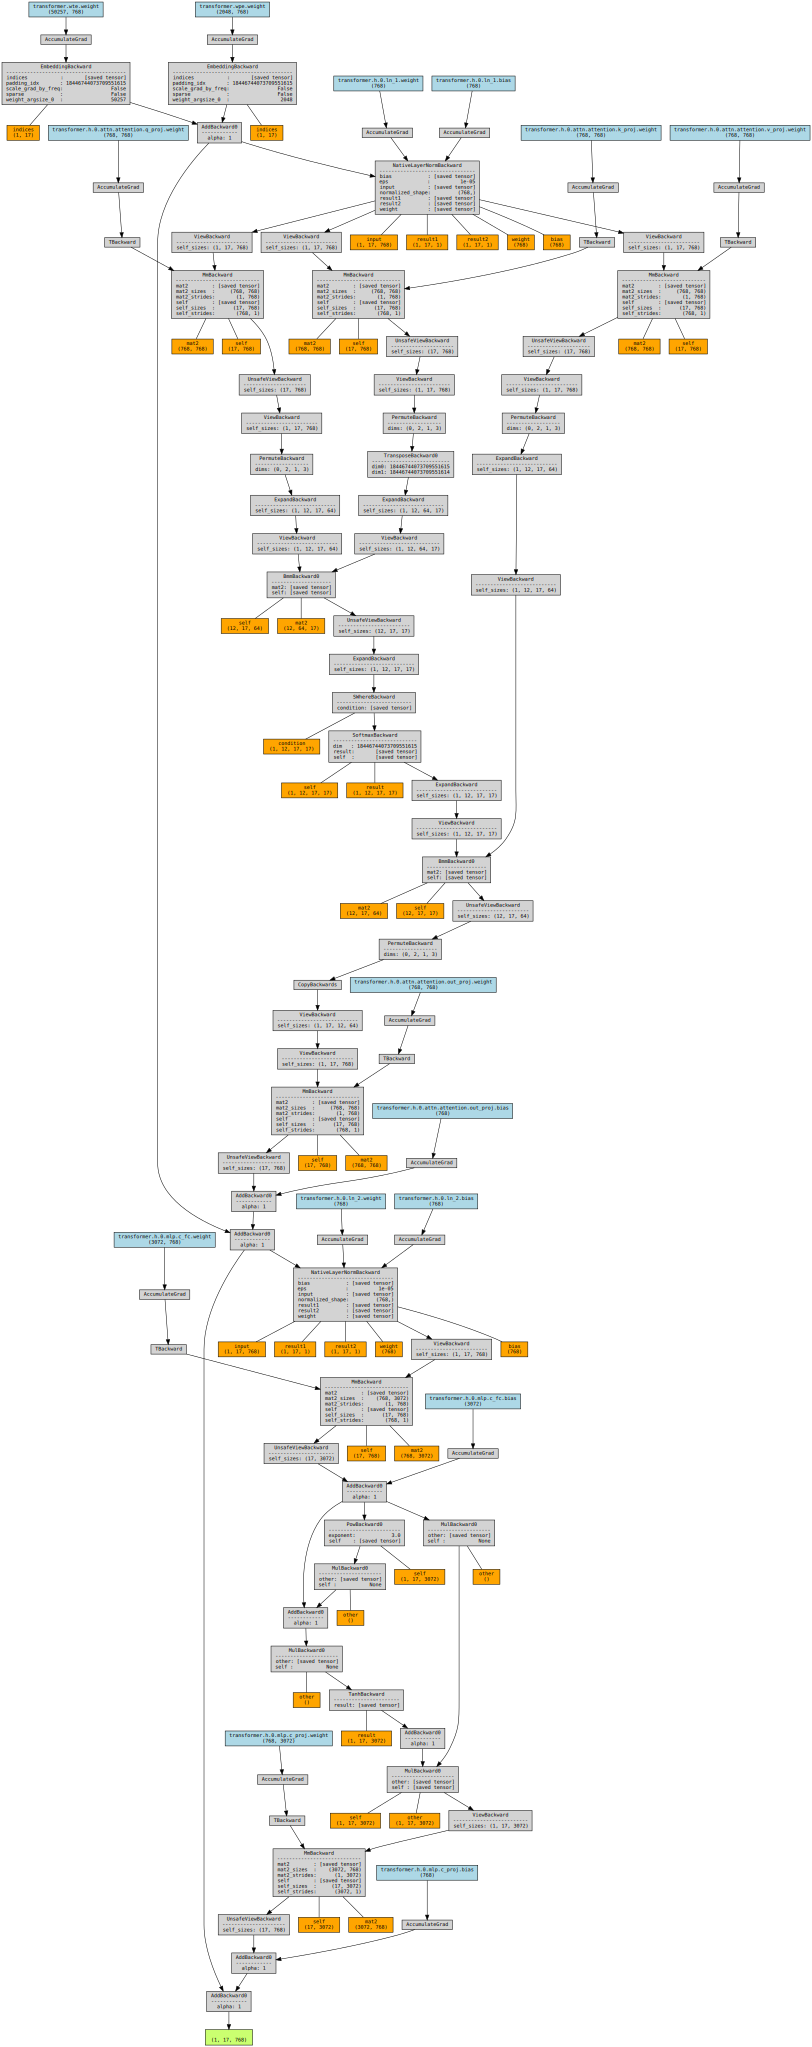

In [13]:
make_dot(small_result,params=dict(model.named_parameters()), show_attrs=True, show_saved=True)